이 데이터는 전 문제와 같이 참 거짓으로 나뉘는게 아니라, 46개의 카테고리로 나뉨
각 카테고리에는 최소한 10개 이상의 데이터가 있음
결국, 데이터를 넣으면 이게 어느 카테고리에 속하는지 맞추는 문제임

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


아래는 원핫 인코딩을 통해 0과 1로만 이루어진 벡터로 변환함
결국, 데이터의 길이가 다 다르니까 벡터의 크기를 10000으로 고정시켜줌

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_rain_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

형식을 맞췄으니, 모델을 만듦
앞에서는 16개의 은닉 유닛을 가지고 특성을 뽑았지만, 이것은 카테고리가 46개의 카테고리에 분류를 해야 하는데, 이보다 작거나 같으면 분류하기 힘드므로, 46보다 큰 64로 은닉 유닛을 잡음
softmax는 categorical로 분류할 때 사용됨

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

아래의 코드는, 전 문제와 같이, 훈련 중에 테스트를 할 수 있도록 x_val, y_val을 빼놓음

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 263us/step - loss: 2.5327 - acc: 0.4957 - val_loss: 1.7229 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.4486 - acc: 0.6873 - val_loss: 1.3485 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.0983 - acc: 0.7642 - val_loss: 1.1728 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.8724 - acc: 0.8148 - val_loss: 1.0794 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7058 - acc: 0.8479 - val_loss: 0.9858 - val_acc: 0.7770
Epoch 6/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.5695 - acc: 0.8786 - val_loss: 0.9422 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4622 - a

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

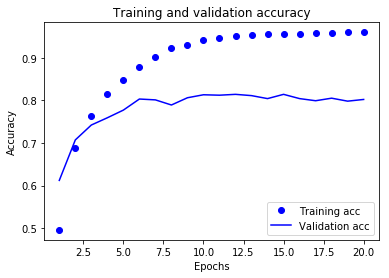

In [10]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

epoch가 9정도 되었을 때, 오버피팅이 되므로, epoch를 재설정해봄

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 220us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.3714 - acc: 0.7121 - val_loss: 1.2772 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 174us/step - loss: 1.0152 - acc: 0.7794 - val_loss: 1.1317 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.7997 - acc: 0.8252 - val_loss: 1.0545 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.6409 - acc: 0.8621 - val_loss: 0.9752 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.5121 - acc: 0.8921 - val_loss: 0.9093 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.4112 - acc: 0.9147 - val_loss: 0.8917 - val_acc: 0.8210
Epoch 8

In [12]:
results

[1.0259320519380237, 0.7751558326443496]

epoch를 9로 줄이니, 정확도가 77퍼정도 나왔음

이 아래의 코드는 2번째 층에서 은닉 유닛이 지나치게 작으면 어떻게 되는지, 시행을 함

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 267us/step - loss: 3.1603 - acc: 0.2413 - val_loss: 2.6048 - val_acc: 0.2750
Epoch 2/20
7982/7982 [==============================] - 2s 214us/step - loss: 2.0501 - acc: 0.5452 - val_loss: 1.7005 - val_acc: 0.5840
Epoch 3/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.5010 - acc: 0.6229 - val_loss: 1.5110 - val_acc: 0.6410
Epoch 4/20
7982/7982 [==============================] - 2s 218us/step - loss: 1.2885 - acc: 0.6926 - val_loss: 1.4135 - val_acc: 0.6750
Epoch 5/20
7982/7982 [==============================] - 2s 214us/step - loss: 1.1460 - acc: 0.7167 - val_loss: 1.3628 - val_acc: 0.6820
Epoch 6/20
7982/7982 [==============================] - 2s 222us/step - loss: 1.0406 - acc: 0.7304 - val_loss: 1.3428 - val_acc: 0.6940
Epoch 7/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.9576 - acc: 0.7410 - val_loss: 1.3379 - val_acc: 0.6980


In [15]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 176us/step


[1.9698866360546325, 0.6914514692787177]